In [3]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Reading the data set
symptoms=pd.read_csv("D:\Detecting parkinsons disease\cleaned-data.csv")
symptoms.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00576,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00576,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00576,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01101,0.000037,0.00593,0.00576,0.01778,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
#columns
symptoms.columns

Index(['Unnamed: 0', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [27]:
#independent variables
x=symptoms.drop(['status','name'],axis=1)

#dependent variable
y=symptoms['status']

In [28]:
#splitting the data set into training and test data set 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [34]:
#predicting the results
y_pred=classifier.predict(x_test)
pd.DataFrame({'actual status':y_test,"predicted status:":y_pred})

,actual status,predicted status:
83,1,1
12,1,1
33,0,0
113,1,1
171,0,0
134,1,1
163,1,1
124,1,1
74,1,1
18,1,1


In [33]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
conf_mat= confusion_matrix(y_test, y_pred) 
conf_mat

array([[ 7,  4],
       [ 0, 38]], dtype=int64)

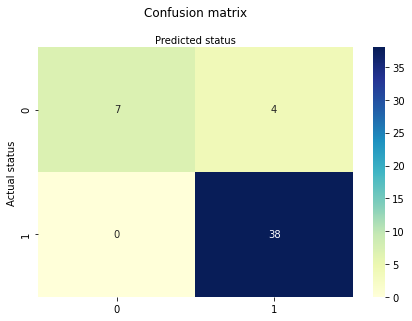

In [37]:
import seaborn as sns
#Heatmap for confusionmatrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual status')
plt.xlabel('Predicted status')
plt.savefig("HeatMap")

In [39]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy_score is :",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy_score is : 91.83673469387756
Precision: 90.47619047619048
Recall: 100.0
